<a href="https://colab.research.google.com/github/beccarebecca/machine-learning-tools-sci-learn-assignment/blob/master/Copy_of_ski_learn_forecasting_stock_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

import pandas as pd
import matplotlib.pyplot as plot
import numpy as np
from numpy import array
from sklearn import linear_model as LM
reg = LM.LinearRegression() 
rgCV = LM.RidgeCV(alphas=np.logspace(-6, 6, 13))
lassoL = LM.LassoLars(alpha=.1)
from sklearn.model_selection import train_test_split


In [0]:

x = []
y = []

#filling my x and y lists with dataframe Adj close data , and appending the number of days to the y list, and then transforming them to a matrix with numpy


stock = pd.read_csv('https://raw.githubusercontent.com/beccarebecca/machine-learning-tools-sci-learn-assignment/master/AAPL(3).csv')
for ind in stock.index: 
     x.append(stock['Adj Close'][ind]) 
     y.append(ind + 1)

x = array(x)

# reshape
x = x.reshape((x.shape[0], 1))
y = array(y)

# reshape
y = y.reshape((y.shape[0], 1))




#splitting my x and y data into training, and testing (for perventing overfitting)

xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size = .25, random_state = 0)
           

In [0]:
# least squares regression training, and prediction


reg.fit(xTrain,yTrain)

#LR_forecast = reg.predict(xTest)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#ridgeCV regression training,and prediction
rgCV.fit(xTrain,yTrain)

#ridge_forecast = rgCV.predict(xTest)


RidgeCV(alphas=array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=False)

In [0]:
# lassoLars regression training, and prediction

lassoL.fit(xTrain,yTrain)

#lasso_forecast = lassoL.predict(xTest)


LassoLars(alpha=0.1, copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
          fit_path=True, max_iter=500, normalize=True, positive=False,
          precompute='auto', verbose=False)

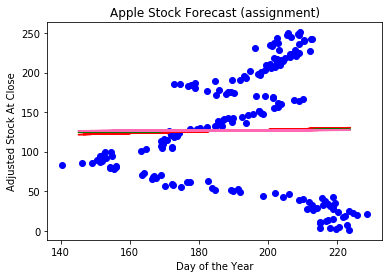

In [0]:
#visual view to the Apple stock prediction against the actual outcome

plot.scatter(xTrain, yTrain, color = 'blue')
plot.plot(xTest,reg.predict(xTest), color ='red')
plot.plot(xTest,lassoL.predict(xTest), color ='green')
plot.plot(xTest,rgCV.predict(xTest), color ='hotPink')
plot.title('Apple Stock Forecast (assignment)') 
plot.xlabel('Day of the Year')
plot.ylabel('Adjusted Stock At Close')
plot.linewidth=4
plot.show()

In [0]:
#score of the most accurate linear model, and percentage

linear_regressionForecast= {reg.score(xTrain, yTrain):'lr_leastsquares',rgCV.score(xTrain, yTrain):'ridgeCV',lassoL.score(xTrain, yTrain):'lasso lars'}
lrModel, accur = max(zip(linear_regressionForecast.values(), linear_regressionForecast.keys()))
print("The linear model that preformed the best in my forecast program was the",lrModel, "at a percent accuacy of" , accur, ".")
  

The linear model that preformed the best in my forecast program was the ridgeCV at a percent accuacy of 0.00013314107777506745 .
